# Evaluating Model's Performance

Accuracy is one but not necessarily the best metric to evaluate a model's performance. There are more informative measures to assess performance.

I'll use _Diabetes_ dataset obtained from the UCI Machine Learning Repository in this Notebook. The goal is to predict the onset of diabetes. The dependent (target) variable "Outcome" is binary.

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Modules for creating a confusion matrix and building a classification report
from sklearn.metrics import classification_report, confusion_matrix

# Module for building a logistic regression model
from sklearn.linear_model import LogisticRegression

# Visually evaluate the model 
from sklearn.metrics import roc_curve

# Calculating AUC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

## EDA

>Note: I'll keep the EDA short, since the focus of this analysis is not exploring the data.

In [10]:
df = pd.read_csv("datasets/diabetes.csv")

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


## Fitting a Model

In [14]:
X = df.drop('Outcome', axis = 1).values # features
y = df['Outcome'].values # target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Train a k-NN classifier to the data 
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train) #fit
y_pred = knn.predict(X_test) #predict

## Evaluating the Performance Quantitavely by Generating a Confusion Matrix and a Classification Report

A confusion matrix is used to describe the performance of a classification model on a set of test data.

In [16]:
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 56  46]]


Classification report gives summary of the precision, recall, F1 score for each class. 

In [17]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



>"The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples." [source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

## Logistic Regression

I'll now use the Logistic Regression for binary classification.

In [21]:
# from sklearn.linear_model import LogisticRegression

In [22]:
# Create the classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



## ROC Curve to Visually Evaluate Models

I'll use ROC curve to assess the classifier's performance. ROC Curve shows the _True Positive Rate (sensitivity, recall or probability of detection)_ against the _False Positive Rate (probability of false alarm)_, and the tradeoff between sensitivity (True Positive Rate) and specificity (True Negative Rate).

In [23]:
# from sklearn.metrics import roc_curve

In [24]:
# Predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Plotting the ROC curve.

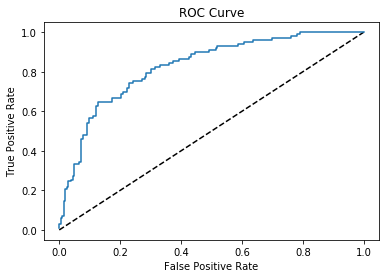

In [25]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Area Under the ROC Curve (AUC)

In [33]:
#from sklearn.metrics import roc_auc_score

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8268608414239483


In [34]:
#from sklearn.model_selection import cross_val_score

# Compute cross-validated AUC scores
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring = 'roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.7987037  0.80796296 0.81944444 0.86584906 0.85037736]


## Precision-recall Curve

Precision-recall curve is another tool to evaluate our model. (only for binary classification). Details can be found at [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) website.

In [29]:
# from sklearn.metrics import precision_recall_curve